### Powertransformer

### 📦 Box-Cox Transformation

#### 📌 What is Box-Cox Transform?
- It’s a **power transform** that makes data more *normally distributed*.  
- Only works if **all values > 0**.  
- Defined as:

$$
y(\lambda) = \frac{x^\lambda - 1}{\lambda}, \quad \text{if } \lambda \neq 0
$$

$$
y(\lambda) = \ln(x), \quad \text{if } \lambda = 0
$$


- `λ` is chosen automatically (via MLE) to make the distribution closest to Gaussian.  

---

#### 📌 Why use it?
- Many ML algorithms (linear regression, etc.) assume **normally distributed features/residuals**.  
- Box-Cox helps:  
  - Reduce skewness.  
  - Stabilize variance.  
  - Improve model performance.  

---


### 🔹 Yeo-Johnson Transformation

### 📌 What is Yeo-Johnson Transform?
- Similar to **Box-Cox**, but **works for both positive and negative values**.  
- Useful when your dataset has zero or negative numbers.  
- It is a **power transform** that helps make data more normally distributed.

#### Formula:
- For x ≥ 0:  
  - If λ ≠ 0 → y = ((x + 1)^λ - 1)/λ  
  - If λ = 0 → y = log(x + 1)  

- For x < 0:  
  - If λ ≠ 2 → y = -((-x + 1)^(2 - λ) - 1)/(2 - λ)  
  - If λ = 2 → y = -log(-x + 1)

- `λ` is estimated automatically to make the transformed data as Gaussian as possible.

---

### 📌 Why use it?
- Handles **negative and zero values** (Box-Cox cannot).  
- Reduces skewness and stabilizes variance.  
- Improves performance of ML models that assume normally distributed features (e.g., Linear Regression).  

---




### Example

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PowerTransformer

In [14]:
df = pd.read_csv(r"C:\Users\Acer\OneDrive\Desktop\Data Science\CSVS\concrete_data.csv")

In [15]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [16]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [17]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [18]:
x = df.drop(columns=['Strength'])
y = df.iloc[: , -1]

In [19]:
x_train , x_test , y_train , y_test = train_test_split(x, y , test_size=0.2, random_state=42)

In [20]:
lr = LinearRegression()

lr.fit(x_train , y_train)

y_pred = lr.predict(x_test)

r2_score(y_test , y_pred)


0.6275531792314848

In [21]:
lr=  LinearRegression()
np.mean(cross_val_score(lr, x , y , scoring='r2'))

np.float64(0.4609940491662864)

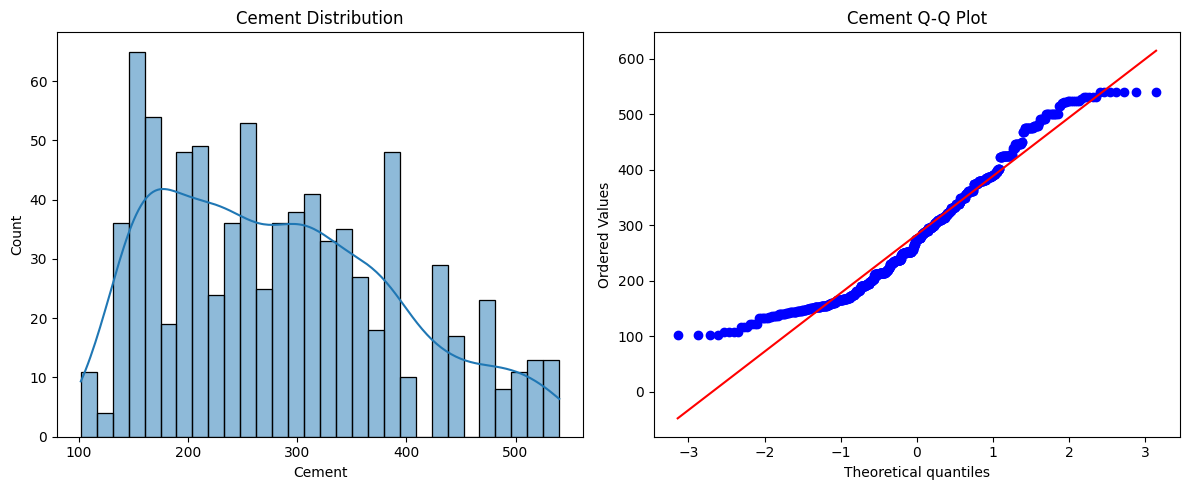

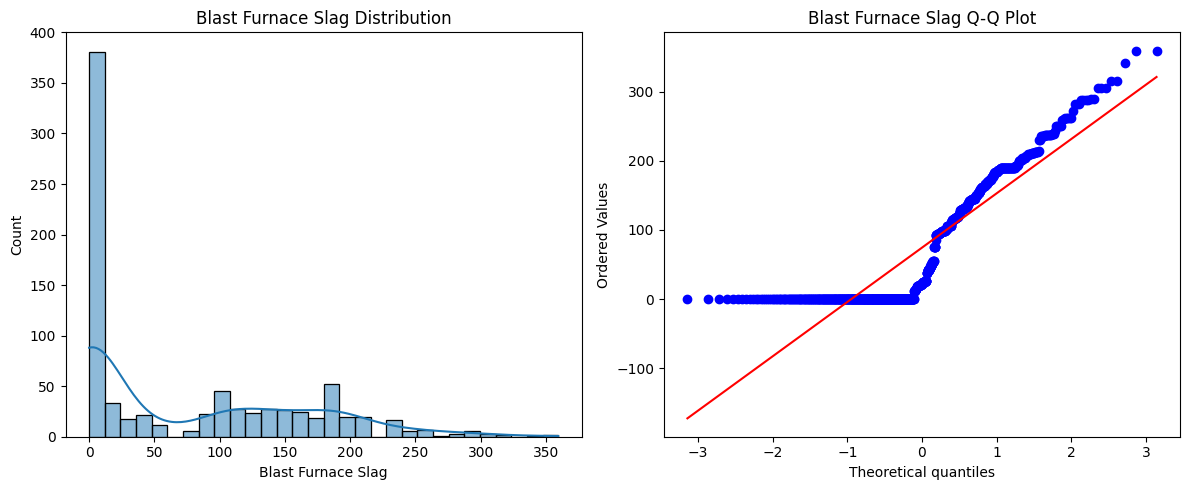

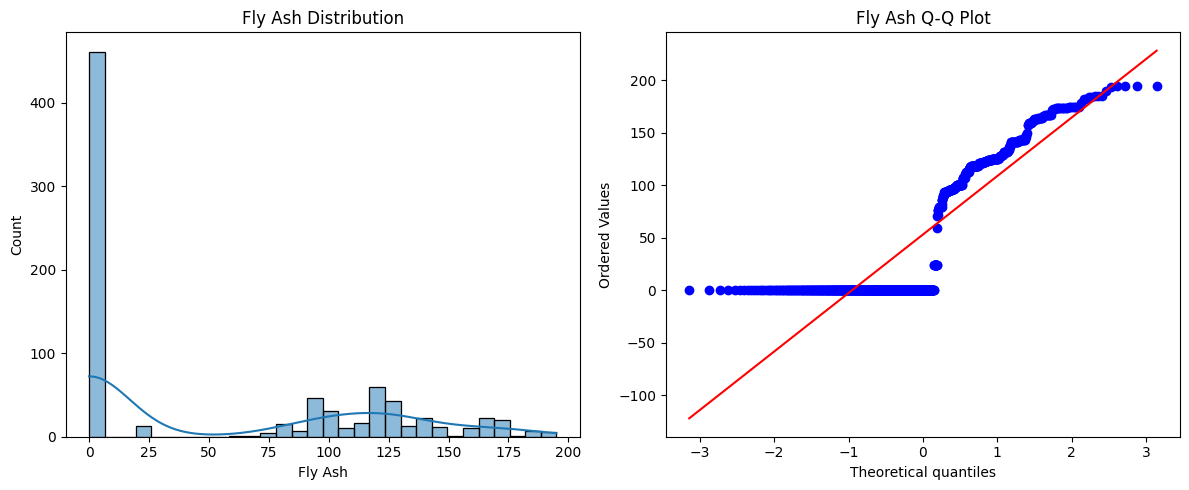

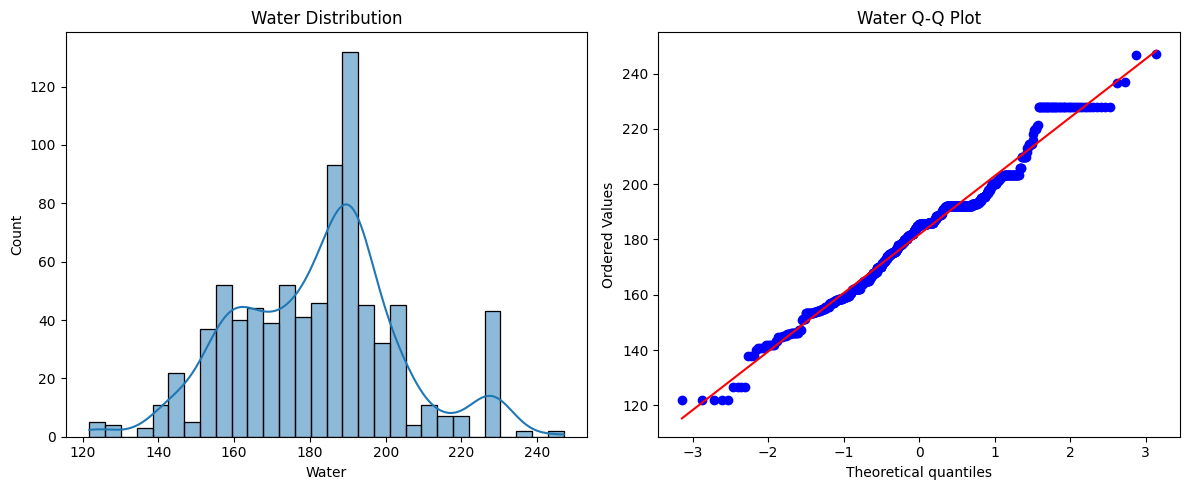

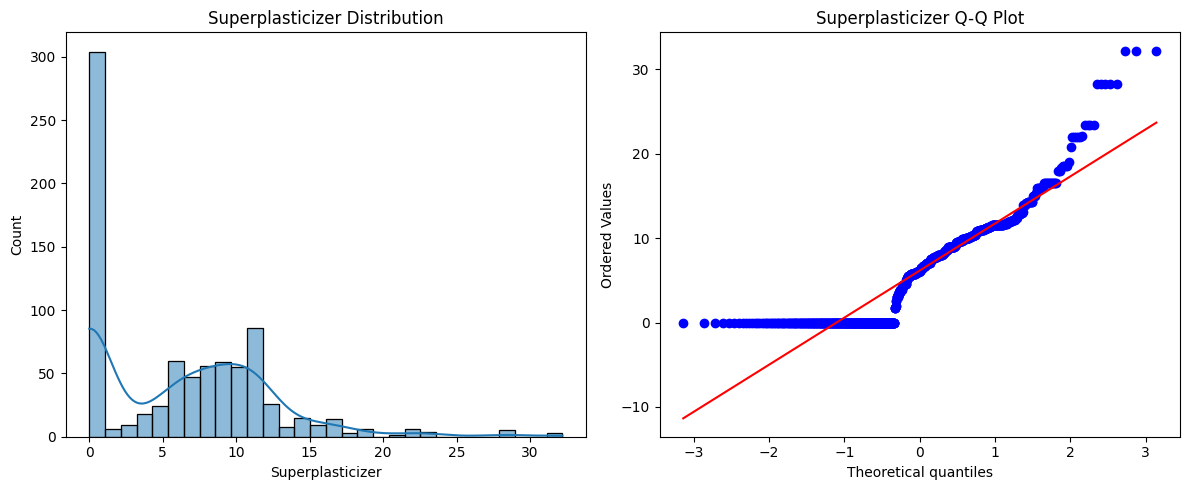

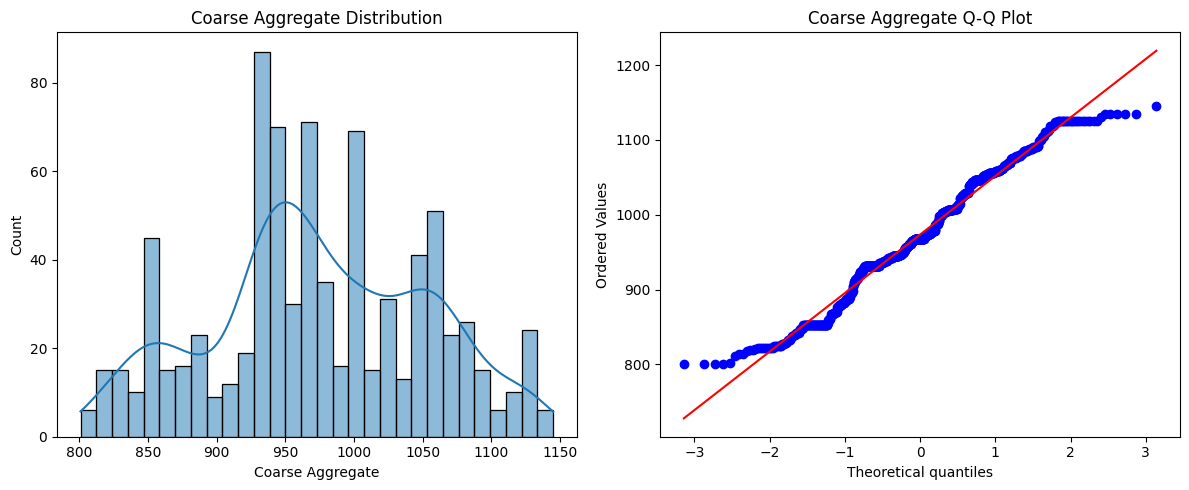

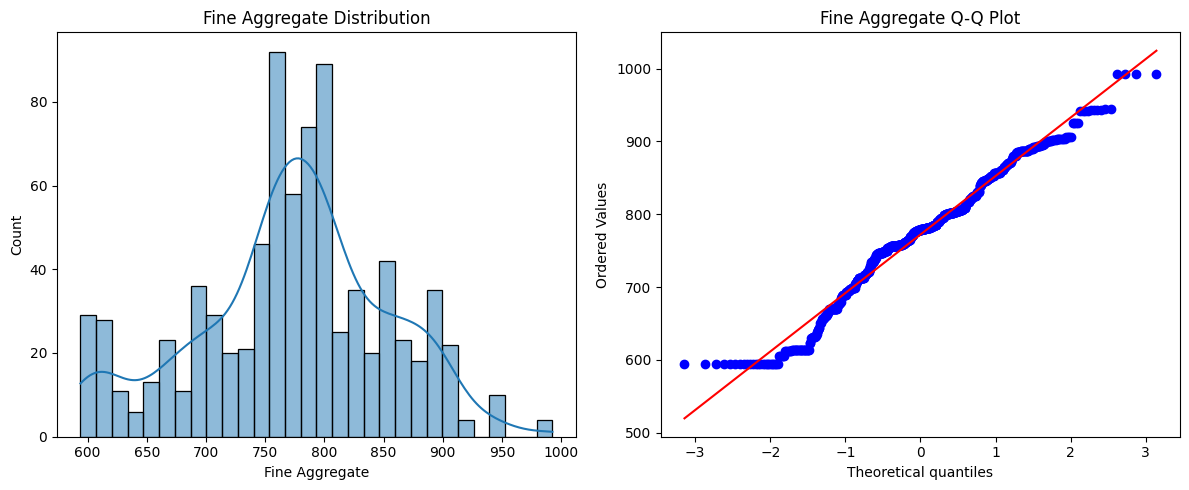

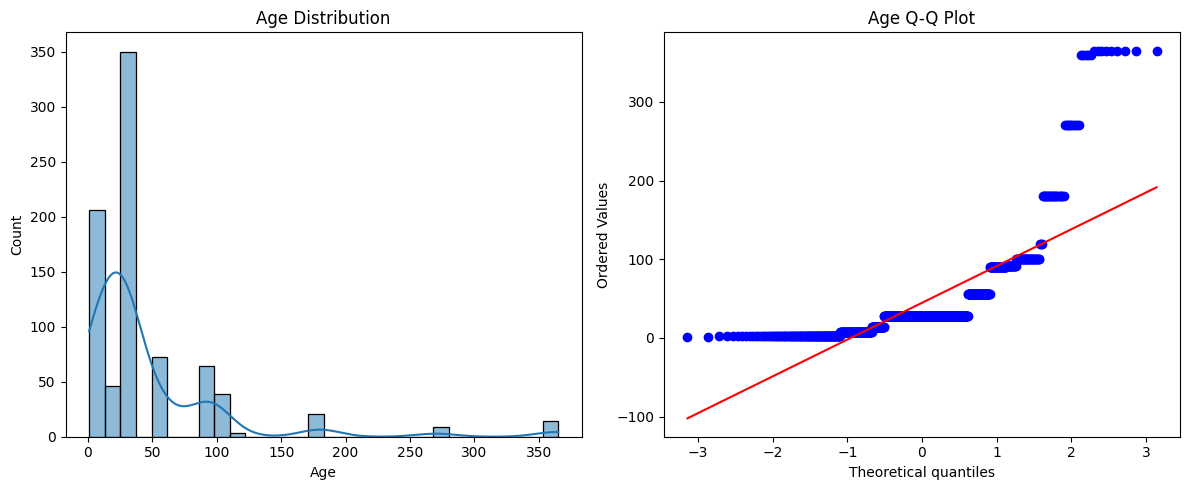

In [22]:
for col in x_train.columns:
    plt.figure(figsize=(12, 5))

    # Histogram / Distribution plot
    plt.subplot(1, 2, 1)
    sns.histplot(x_train[col], kde=True, bins=30)
    plt.title(f'{col} Distribution')

    # Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(x_train[col], dist='norm', plot=plt)
    plt.title(f'{col} Q-Q Plot')

    plt.tight_layout()
    plt.show()

In [23]:
pt = PowerTransformer(method='box-cox')
x_train_transformed = pt.fit_transform(x_train+0.00001)
x_test_transformed = pt.transform(x_test+0.00001)

pd.DataFrame({'cols': x_train.columns,  'box_cox_lambdas': pt.lambdas_})

,cols,box_cox_lambdas
0,Cement,0.177025
1,Blast Furnace Slag,0.027842
2,Fly Ash,-0.044554
3,Water,0.772682
4,Superplasticizer,0.113892
5,Coarse Aggregate,1.129813
6,Fine Aggregate,1.782018
7,Age,0.066630


In [25]:
lr = LinearRegression()
lr.fit(x_train_transformed , y_train)
y_pred2 = lr.predict(x_test_transformed)
r2_score(y_test , y_pred2)

0.8054599366002649

In [26]:
pt = PowerTransformer(method='box-cox')
x_transformed = pt.fit_transform(x+0.000001)

lr = LinearRegression()
np.mean(cross_val_score(lr ,x_transformed , y , scoring='r2'))

np.float64(0.6662950326831086)

In [31]:
x_train_transformed_df = pd.DataFrame(x_train_transformed, columns=x_train.columns)

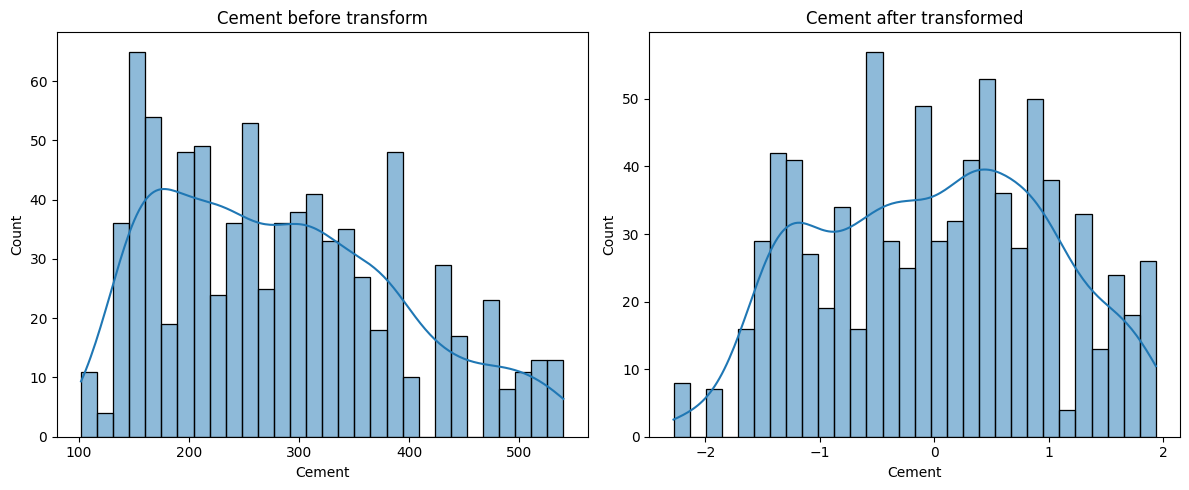

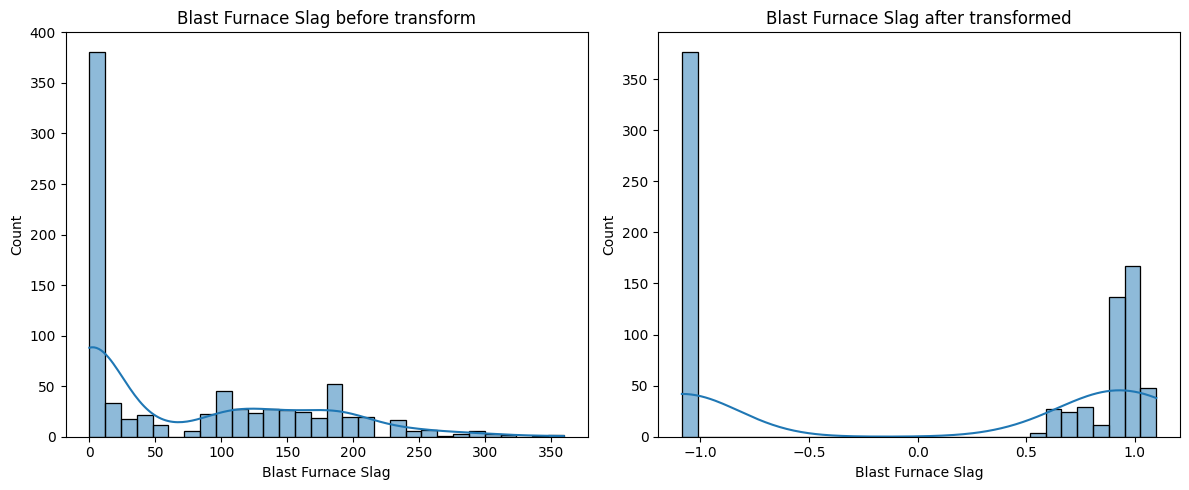

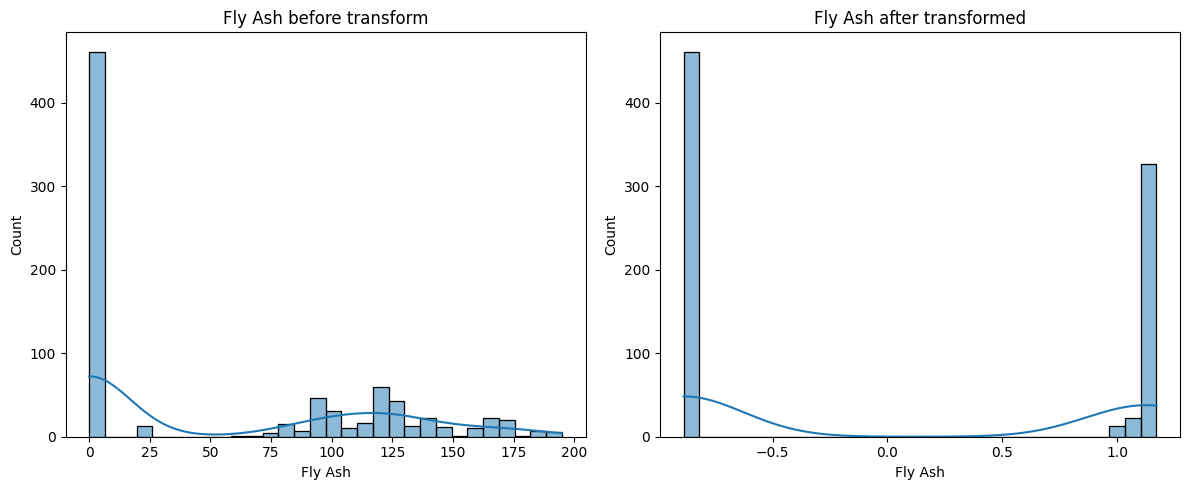

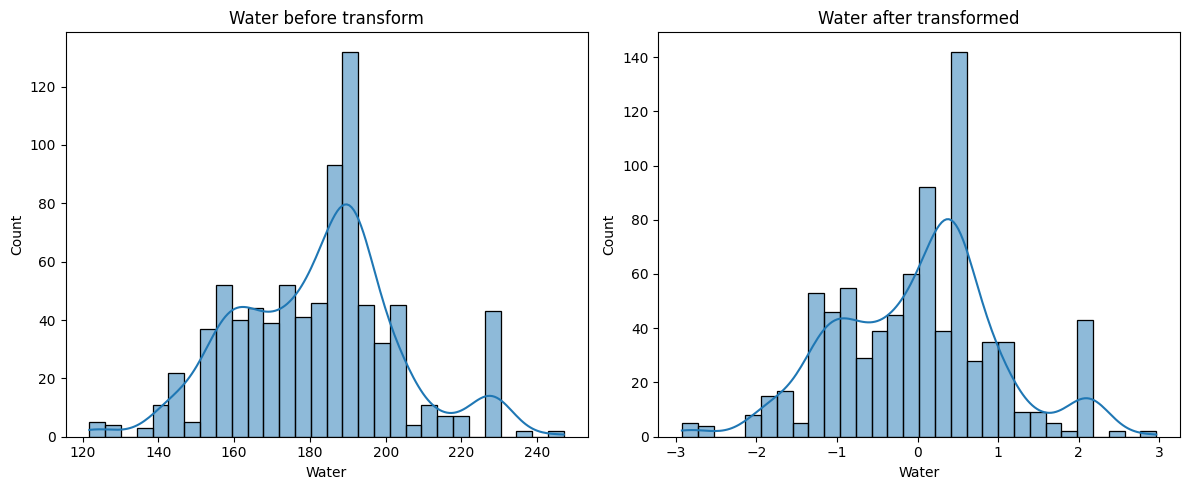

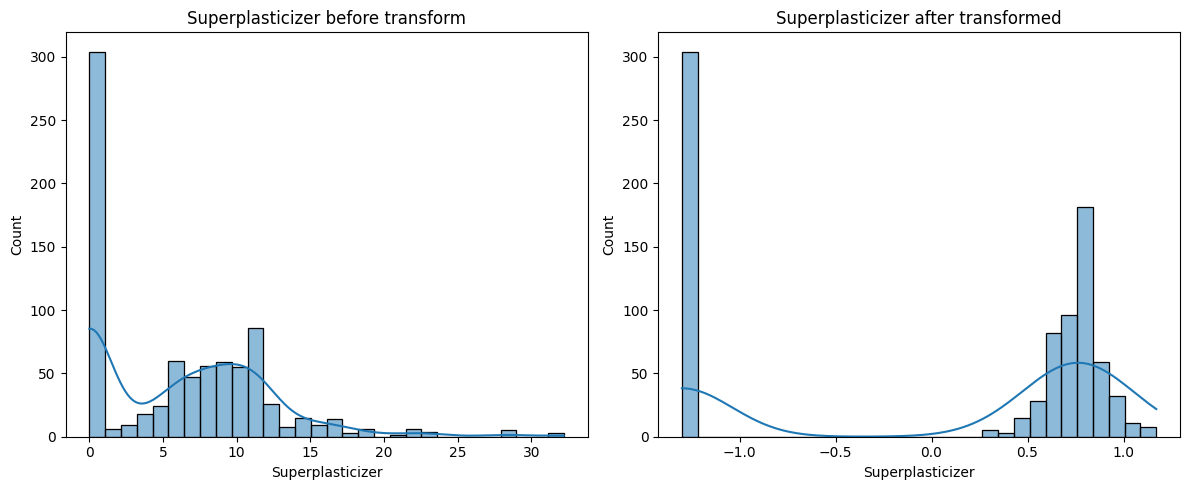

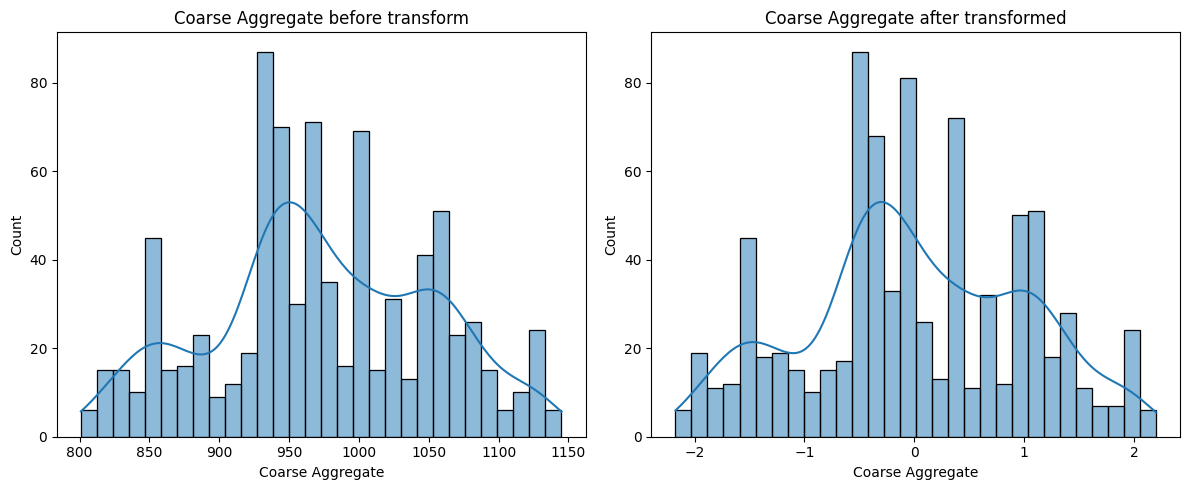

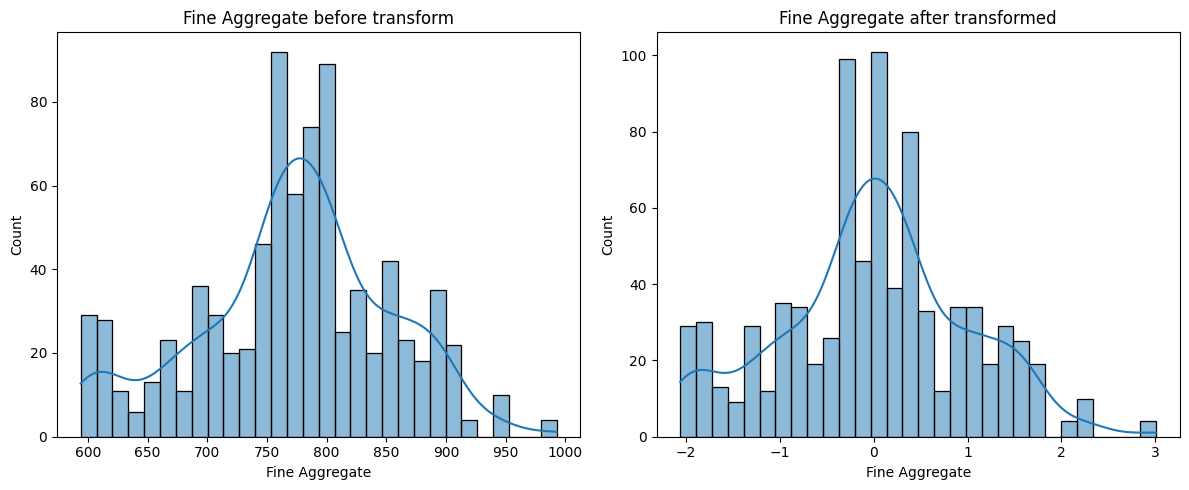

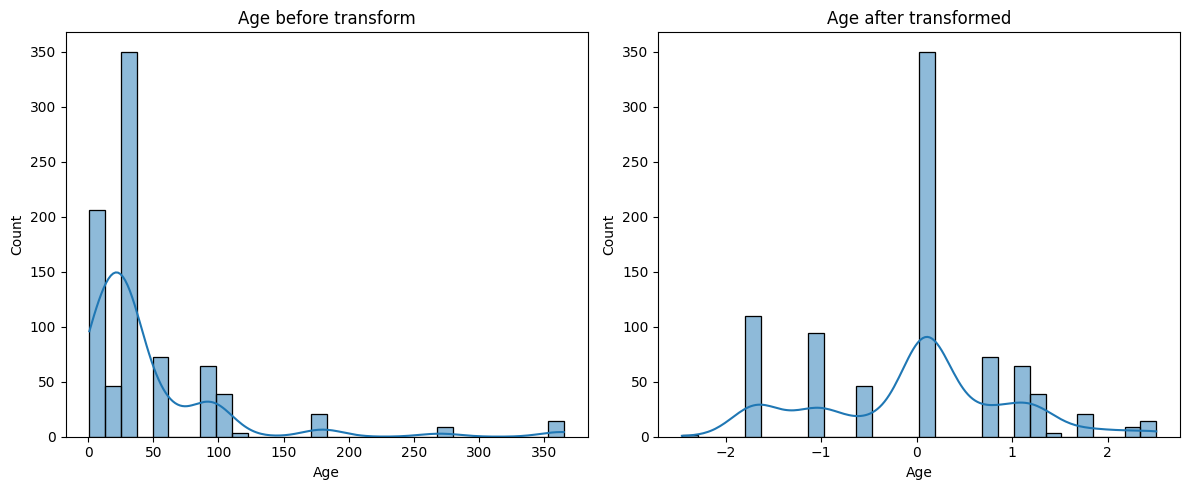

In [34]:

for col in x_train_transformed_df.columns:
    plt.figure(figsize=(12, 5))

    # Histogram / Distribution plot
    plt.subplot(1, 2, 1)
    sns.histplot(x_train[col], kde=True, bins=30)
    plt.title(f'{col} before transform')

    plt.subplot(1 , 2 , 2)
    sns.histplot(x_train_transformed_df[col] , kde=True , bins = 30)
    plt.title(f'{col} after transformed')

    plt.tight_layout()
    plt.show()

In [36]:
pt1 = PowerTransformer()

x_train_transformed2 = pt1.fit_transform(x_train)
x_test_transformed2 = pt1.transform(x_test)

lr = LinearRegression()
lr.fit(x_train_transformed2 , y_train)

y_predict3 = lr.predict(x_test_transformed2)
print(r2_score(y_test , y_predict3))

pd.DataFrame({'cols': x_train.columns , 'Yeo_Johnson_lambda': pt1.lambdas_})


0.8161906511066099


,cols,Yeo_Johnson_lambda
0,Cement,0.174348
1,Blast Furnace Slag,0.015715
2,Fly Ash,-0.161447
3,Water,0.771307
4,Superplasticizer,0.253935
5,Coarse Aggregate,1.130050
6,Fine Aggregate,1.783100
7,Age,0.019885


In [38]:
pt = PowerTransformer()
x_transformed2 = pt.fit_transform(x)

lr = LinearRegression()
np.mean(cross_val_score(lr , x_transformed2 , y ,scoring='r2'))

np.float64(0.6834625126992433)

In [41]:
x_transformed2_df = pd.DataFrame(x_transformed2 , columns=x_train.columns)

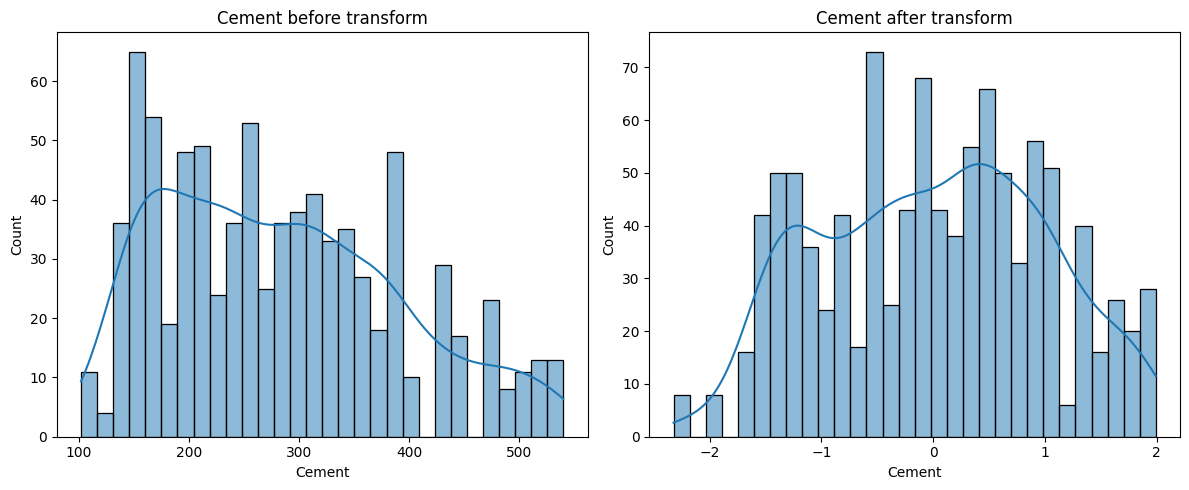

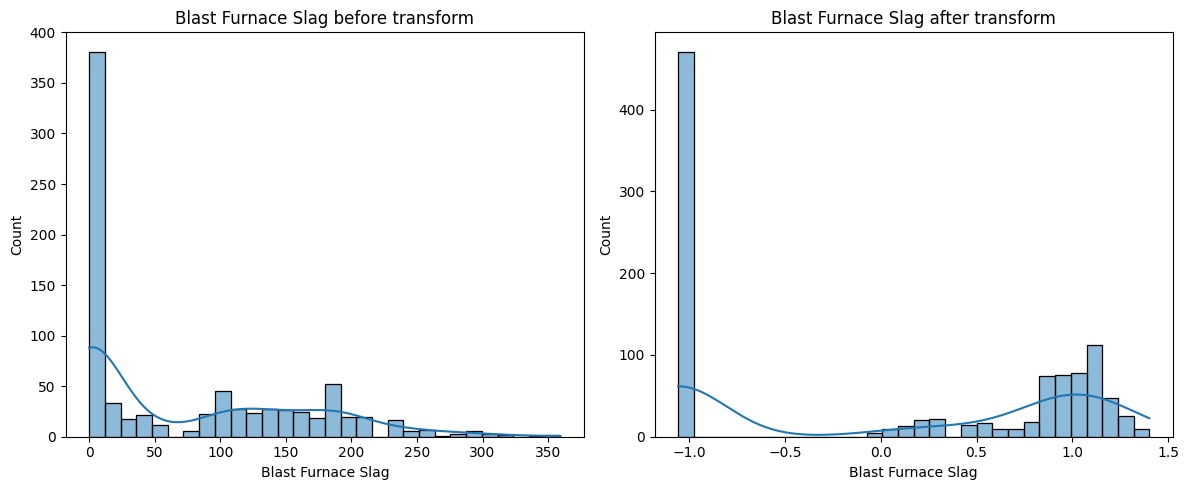

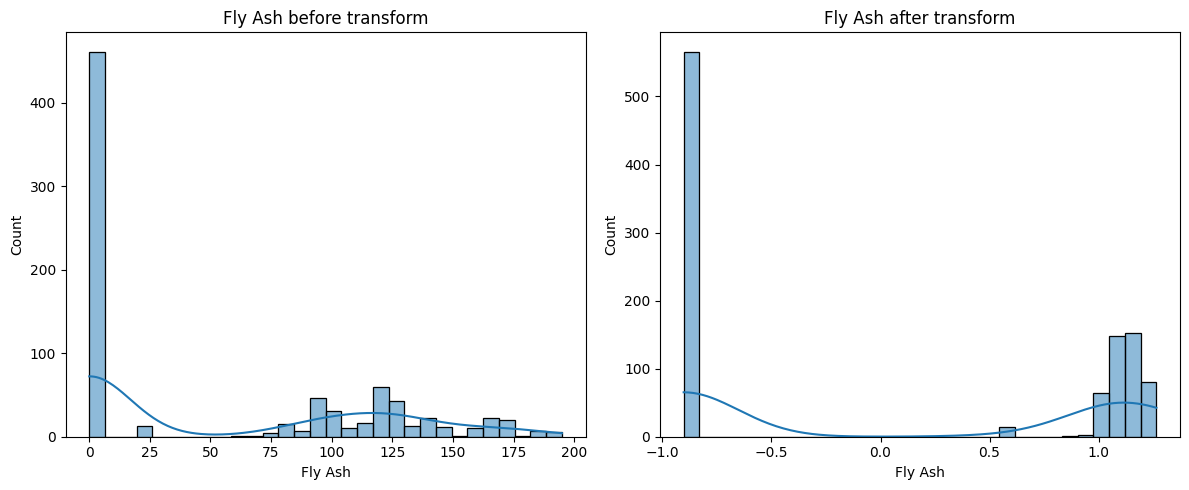

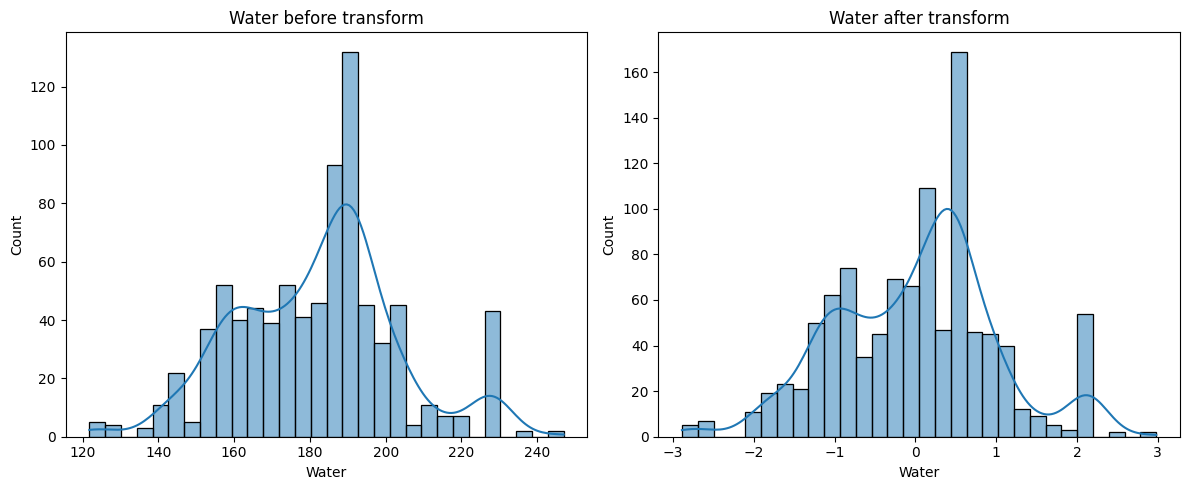

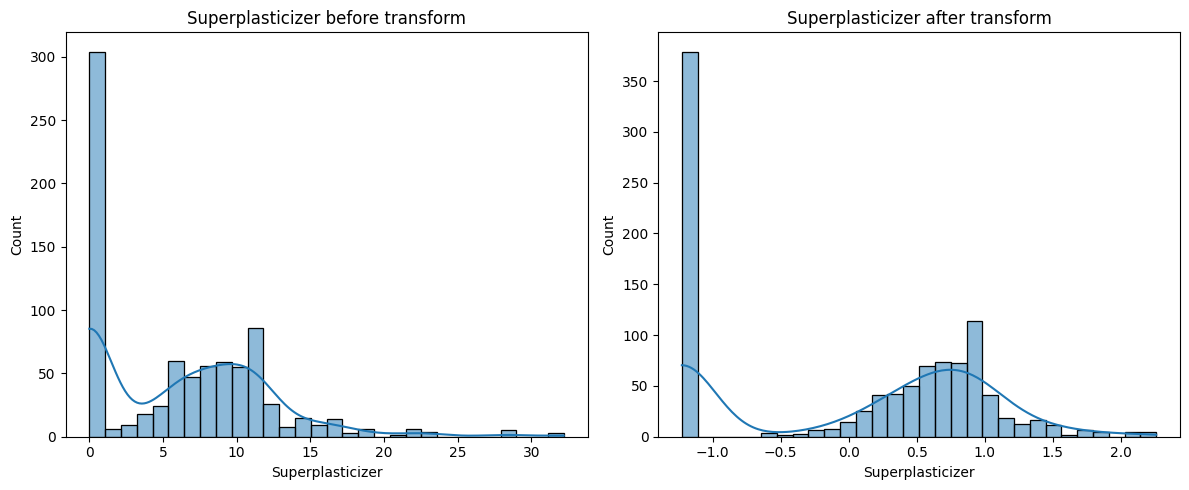

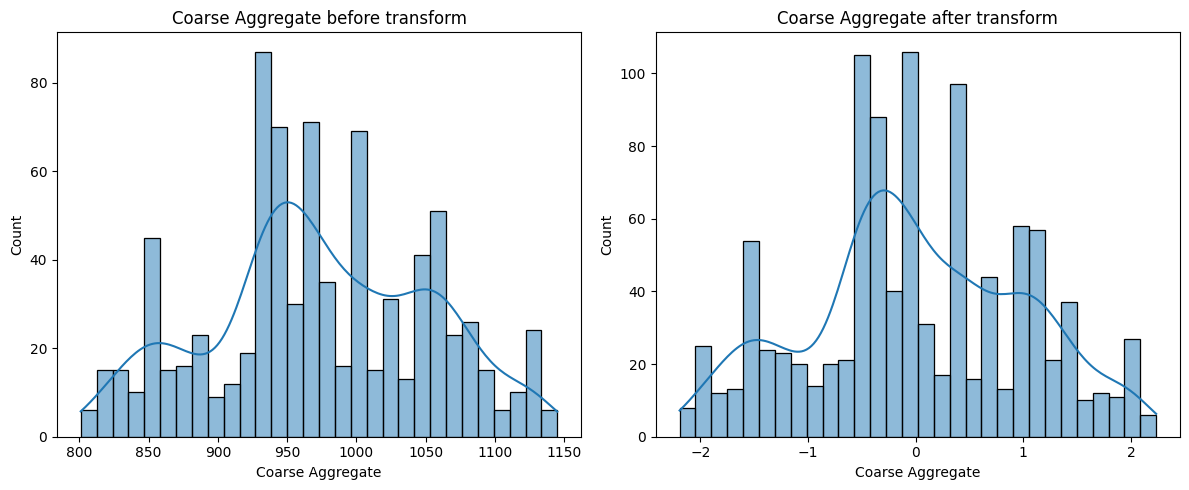

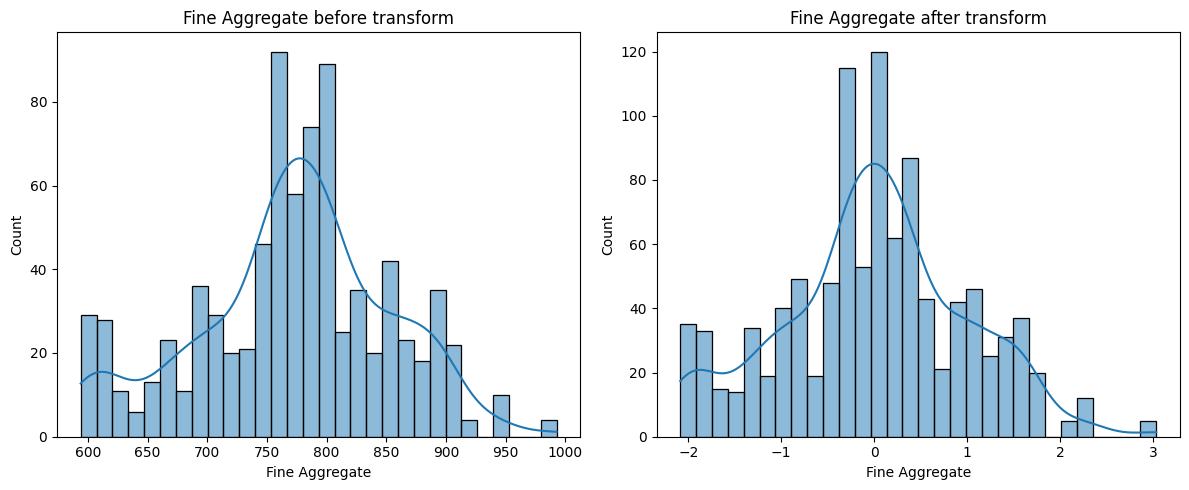

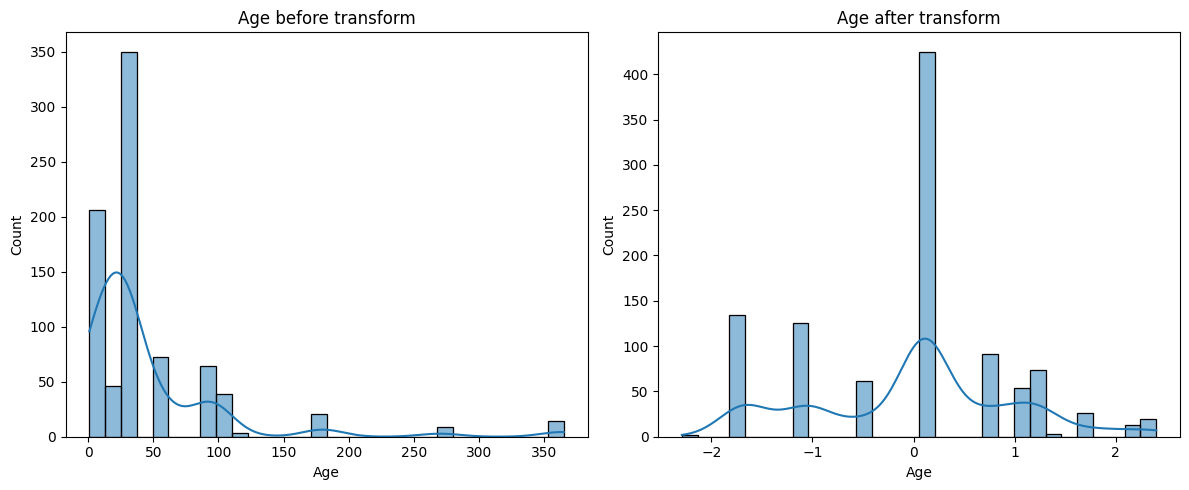

In [44]:
for col in x_transformed2_df:
    plt.figure(figsize=(12, 5))
    plt.subplot(1,2,1)

    sns.histplot(x_train[col] , kde=True , bins = 30)
    plt.title(f'{col} before transform')

    plt.subplot(1,2,2)

    sns.histplot(x_transformed2_df[col] , kde=True , bins = 30)
    plt.title(f'{col} after transform')

    plt.tight_layout()
    plt.show()


In [45]:
pd.DataFrame({'cols': x_train.columns , 'box_cox_lambdas': pt.lambdas_ , 'Yeo_johnson_lambdas': pt1.lambdas_})

,cols,box_cox_lambdas,Yeo_johnson_lambdas
0,Cement,0.169544,0.174348
1,Blast Furnace Slag,0.016633,0.015715
2,Fly Ash,-0.136480,-0.161447
3,Water,0.808438,0.771307
4,Superplasticizer,0.264160,0.253935
5,Coarse Aggregate,1.129395,1.130050
6,Fine Aggregate,1.830764,1.783100
7,Age,0.001771,0.019885
